# ROC curve

ref.
- https://qiita.com/TsutomuNakamura/items/a1a6a02cb9bb0dcbb37f
- https://qiita.com/TsutomuNakamura/items/ef963381e5d2768791d4
- https://qiita.com/kotai2003/items/f4123b146e09808010ae
- https://qiita.com/shuhigashi/items/cb6816a1da1d347bbdc2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc

## Create OK and NG data based on gaussiain distribution

In [2]:
n_ok, mean_ok, std_ok = int(1e4), 4, 0.5
n_ng, mean_ng, std_ng = int(1e3), 3, 0.5

data_ok = np.random.normal(loc=mean_ok, scale=std_ok, size=n_ok)
data_ng = np.random.normal(loc=mean_ng, scale=std_ng, size=n_ng)

print("OK data shape")
print(data_ok.shape)
print("NG data shape")
print(data_ng.shape)

OK data shape
(10000,)
NG data shape
(1000,)


## Show histogram

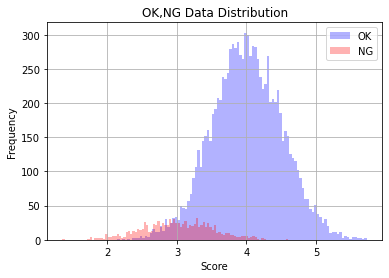

In [3]:
plt.hist(data_ok, bins=100, color='blue',alpha=0.3,density=False, label='OK')
plt.hist(data_ng, bins=100, color='red', alpha=0.3,density=False, label='NG')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('OK,NG Data Distribution')
plt.grid()
plt.legend()
plt.show()

## Show distribution histogram

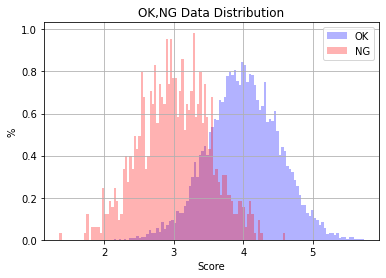

In [4]:
plt.hist(data_ok, bins=100, color='blue',alpha=0.3,density=True, label='OK')
plt.hist(data_ng, bins=100, color='red', alpha=0.3,density=True, label='NG')
plt.xlabel('Score')
plt.ylabel('%')
plt.title('OK,NG Data Distribution')
plt.grid()
plt.legend()
plt.show()

## Confusion Matrix

ref.  
https://qiita.com/TsutomuNakamura/items/a1a6a02cb9bb0dcbb37f  
https://qiita.com/shuhigashi/items/cb6816a1da1d347bbdc2  

- TP => True Positive
- FP => False Positive
- FN => False Negative
- TN => True NegativeNegative


### Accuracy

$$
    \mathrm{Accuracy}
    =
    \frac{\mathrm{TP + TN}}{\mathrm{TP + FP + FN + TN}}
$$


### Precision

$$
    \mathrm{Presision}
    =
    \frac{\mathrm{TP}}{\mathrm{TP + FP}}
$$


### Recall (True Positive Rate)

$$
    \mathrm{Recall}
    =
    \frac{\mathrm{TP}}{\mathrm{TP + FN}}
$$


### Recall (True Negative Rate)

$$
    \mathrm{NRecall}
    =
    \frac{\mathrm{TN}}{\mathrm{TN + FP}}
$$


### For more informations
see https://qiita.com/shuhigashi/items/cb6816a1da1d347bbdc2

In [5]:
data_all = np.hstack((data_ok, data_ng))
label_all = np.array(
    [ 1 for _ in range(n_ok) ] + [ 0 for _ in range(n_ng) ])
print(data_all.shape)
print(label_all.shape)

(11000,)
(11000,)


In [6]:
fpr, tpr, thresholds = roc_curve(y_true=label_all,
                                 y_score=data_all)
auc_value = auc(x=fpr, y=tpr)

In [7]:
print('False positive rate',fpr)

print('True positive rate',tpr)

print('Thresholds',thresholds)

False positive rate [0.    0.    0.    ... 0.964 0.964 1.   ]
True positive rate [0.000e+00 1.000e-04 7.730e-02 ... 9.999e-01 1.000e+00 1.000e+00]
Thresholds [6.86398551 5.86398551 4.70619818 ... 2.05756477 2.05723717 1.5633734 ]


# auc value is the area under the curve circled by x=0 and y=0


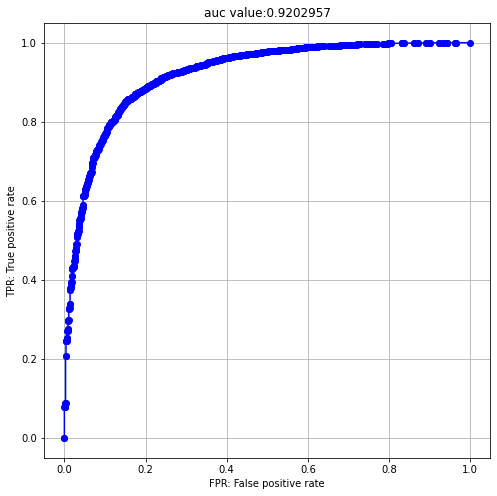

In [8]:
print("# auc value is the area under the curve circled by x=0 and y=0")
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='blue', marker='o')

plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title( 'auc value:' + str(auc_value))
plt.grid()
plt.show()